<a href="https://colab.research.google.com/github/jnqeras/SBERT/blob/main/SBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installation**
We recommend Python 3.6 or higher, PyTorch 1.6.0 or higher and transformers v4.6.0 or higher. The code does not work with Python 2.7.

Install SentenceTransformers
# **New section**

**Install with pip**

Install the sentence-transformers with pip:

In [ ]:
!pip install -U sentence-transformers

     |████████████████████████████████| 78 kB 3.6 MB/s 
     |████████████████████████████████| 3.4 MB 10.7 MB/s 
     |████████████████████████████████| 6.8 MB 44.9 MB/s 
     |████████████████████████████████| 1.2 MB 52.3 MB/s 
     |████████████████████████████████| 67 kB 6.0 MB/s 
     |████████████████████████████████| 895 kB 61.0 MB/s 
     |████████████████████████████████| 596 kB 43.5 MB/s 
     |████████████████████████████████| 3.3 MB 62.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=120999 sha256=c88484c7092c51216f58daceab5ece494ca48fed04de05890ca178832919e96d
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# **Quickstart**
Once you have SentenceTransformers installed, the usage is simple:



In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.', 
    'The quick brown fox jumps over the lazy dog.']

#Sentences are encoded by calling model.encode()
sentence_embeddings = model.encode(sentences)

#Print the embeddings
for sentence, embedding in zip(sentences, sentence_embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: This framework generates embeddings for each input sentence
Embedding: [-1.37173422e-02 -4.28515561e-02 -1.56285800e-02  1.40537368e-02
  3.95537987e-02  1.21796280e-01  2.94333957e-02 -3.17524187e-02
  3.54959741e-02 -7.93139860e-02  1.75878350e-02 -4.04369980e-02
  4.97259498e-02  2.54912097e-02 -7.18700439e-02  8.14969167e-02
  1.47071143e-03  4.79627252e-02 -4.50336374e-02 -9.92174894e-02
 -2.81769391e-02  6.45046085e-02  4.44670394e-02 -4.76217046e-02
 -3.52952331e-02  4.38671485e-02 -5.28566055e-02  4.33061097e-04
  1.01921462e-01  1.64072551e-02  3.26996371e-02 -3.45986746e-02
  1.21339187e-02  7.94871300e-02  4.58345236e-03  1.57778300e-02
 -9.68206301e-03  2.87626013e-02 -5.05805984e-02 -1.55793326e-02
 -2.87906732e-02 -9.62281041e-03  3.15556638e-02  2.27348991e-02
  8.71449336e-02 -3.85027267e-02 -8.84718522e-02 -8.75497889e-03
 -2.12343764e-02  2.08923239e-02 -9.02077332e-02 -5.25732227e-02
 -1.05639026e-02  2.88310666e-02 -1.61455069e-02  6.17838185e-03
 -1.23234

With SentenceTransformer('all-MiniLM-L6-v2') we define which sentence transformer model we like to load. In this example, we load all-MiniLM-L6-v2, which is a MiniLM model fine tuned on a large dataset of over 1 billion training pairs.

BERT (and other transformer networks) output for each token in our input text an embedding. In order to create a fixed-sized sentence embedding out of this, the model applies mean pooling, i.e., the output embeddings for all tokens are averaged to yield a fixed-sized vector.

#**Comparing Sentence Similarities**
The sentences (texts) are mapped such that sentences with similar meanings are close in vector space. One common method to measure the similarity in vector space is to use **cosine similarity**. For two sentences, this can be done like this:

In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

#Sentences are encoded by calling model.encode()
emb1 = model.encode("This is a red cat with a hat.")
emb2 = model.encode("Have you seen my red cat?")

cos_sim = util.cos_sim(emb1, emb2)
print("Cosine-Similarity:", cos_sim)

Cosine-Similarity: tensor([[0.6153]])


If you have a list with more sentences, you can use the following code example:



In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

sentences = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'The girl is carrying a baby.',
          'A man is riding a horse.',
          'A woman is playing violin.',
          'Two men pushed carts through the woods.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.'
          ]

#Encode all sentences
embeddings = model.encode(sentences)

#Compute cosine similarity between all pairs
cos_sim = util.cos_sim(embeddings, embeddings)

#Add all pairs to a list with their cosine similarity score
all_sentence_combinations = []
for i in range(len(cos_sim)-1):
    for j in range(i+1, len(cos_sim)):
        all_sentence_combinations.append([cos_sim[i][j], i, j])  #ficme: creo que en cada append, lo que hace es guardar un array de tres elementos (el valor
        # de la matriz cos_sim en la pos ij, el índice i y el índice j).

#Sort list by the highest cosine similarity score
all_sentence_combinations = sorted(all_sentence_combinations, key=lambda x: x[0], reverse=True)

print("Top-5 most similar pairs:")
for score, i, j in all_sentence_combinations[0:5]:
    print("{} \t {} \t {:.4f}".format(sentences[i], sentences[j], cos_sim[i][j]))   #fixme: '\t' es un tab space. '{}' tina
    # inputs y los coloca donde aparece el '{}' (en este caso, el primer parámetro es sentences[i]). {:.4f} es algo de la función format, que no busqué todavía.

Top-5 most similar pairs:
A man is eating food. 	 A man is eating a piece of bread. 	 0.7553
A man is riding a horse. 	 A man is riding a white horse on an enclosed ground. 	 0.7369
A monkey is playing drums. 	 Someone in a gorilla costume is playing a set of drums. 	 0.6433
A woman is playing violin. 	 Someone in a gorilla costume is playing a set of drums. 	 0.2564
A man is eating food. 	 A man is riding a horse. 	 0.2474


See on the left the Usage sections for more examples how to use SentenceTransformers.

# **Pre-Trained Models**
Various pre-trained models exists optimized for many tasks exists. For a full list, see Pretrained Models.

# **Training your own Embeddings**
Training your own sentence embeddings models for all type of use-cases is easy and requires often only minimal coding effort. For a comprehensive tutorial, see Training/Overview.

You can also extend easily existent sentence embeddings models to further languages. For details, see [Multi-Lingual Training](https://www.sbert.net/examples/training/multilingual/README.html).

# **Pretrained Models**
We provide various pre-trained models. Using these models is easy:

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distiluse-base-multilingual-cased-v2') #fixme: antes decía 'model_name', pero lo cambié por 'distiluse-base-...' para probar ese.

All models are hosted on the [HuggingFace Model Hub](https://huggingface.co/sentence-transformers).

# **Model Overview**
The following table provides an overview of (selected) models. They have been extensively evaluated for their quality to embedded sentences (Performance Sentence Embeddings) and to embedded search queries & paragraphs (Performance Semantic Search).

The all-* models where trained on all available training data (more than 1 billion training pairs) and are designed as general purpose models. The all-mpnet-base-v2 model provides the best quality, while all-MiniLM-L6-v2 is 5 times faster and still offers good quality. Toggle All models to see all evaluated models or visit HuggingFace Model Hub to view all existing sentence-transformers models.

fixme: ver la tabla en https://www.sbert.net/docs/pretrained_models.html

##**Los nombres de las columnas de la tabla son:**

**Model Name.**

**Performance Sentence Embeddings.**

Average performance on encoding sentences over 14 diverse tasks from different domains.

Higher = Better.

Fixme: tendría que averigüar cómo se mide la performance.

**Performance Semantic Search.**

Performance on 6 diverse tasks for semantic search:

Encoding of queries / questions and paragraphs up to 512 word pieces.

fixme: averiguar en que 6 tareas y que significan cada una.

Higher = Better.

**Average Performance.**

Average of sentence performance and semantic search performance.

Higher = Better.

**Encoding Speed.**

Encoding speed (sentences / sec) on a V100 GPU.

Higher = Better.

# **Semantic Search**
The following models have been specifically trained for Semantic Search: Given a question / search query, these models are able to find relevant text passages. For more details, see [Usage - Semantic Search](https://www.sbert.net/examples/applications/semantic-search/README.html).

In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')

query_embedding = model.encode('How big is London')
passage_embedding = model.encode(['London has 9,787,426 inhabitants at the 2011 census',
                                  'London is known for its finacial district'])

print("Similarity:", util.dot_score(query_embedding, passage_embedding))
#fixme: supongo que el resultado que printeo, respeta el orden de passage_embedding. Creo que debería tener mayor
# similaridad la frase que habla de la cantidad de habitantes de Londres.

Similarity: tensor([[0.5472, 0.6330]])


# **Multi-QA Models**
The following models have been trained on [215M question-answer](https://huggingface.co/sentence-transformers/multi-qa-MiniLM-L6-dot-v1#training) pairs from various sources and domains, including StackExchange, Yahoo Answers, Google & Bing search queries and many more. These model perform well across many search tasks and domains.

These models were tuned to be used with dot-product (fixme: no sé que quiere decir que el modelo fue tuneado para ser usado con dot-product. Creo que voy a tener que chequear que el modelo que utilice, permita las operaciones que necesito para mi tésis):
Fixme: ver tabla en la página https://www.sbert.net/docs/pretrained_models.html

These models produce normalized vectors of length 1, which can be used with dot-product, cosine-similarity and Euclidean distance:
Fixme: ver tabla en la página https://www.sbert.net/docs/pretrained_models.html

#**MSMARCO Passage Models**

The [MSMARCO Passage Ranking Dataset](https://github.com/microsoft/MSMARCO-Passage-Ranking) contains 500k real queries from Bing search together with the relevant passages from various web sources. Given the diversity of the MSMARCO dataset, models also perform well on other domains.

Models tuned to be used with dot-product:
Fixme: ver tabla en la página https://www.sbert.net/docs/pretrained_models.html

These models produce normalized vectors of length 1, which can be used with dot-product, cosine-similarity and Euclidean distance:

Fixme: ver tabla en la página https://www.sbert.net/docs/pretrained_models.html

[MSMARCO Models - More details](https://www.sbert.net/docs/pretrained-models/msmarco-v5.html)

#**Multi-Lingual Models**

The following models generate aligned vector spaces, i.e., similar inputs in different languages are mapped close in vector space. You do not need to specify the input language. [Details are in our publication Making Monolingual Sentence Embeddings Multilingual using Knowledge Distillation](https://arxiv.org/abs/2004.09813) (fixme: chusmear este paper). We used the following 50+ languages: ar, bg, ca, cs, da, de, el, es, et, fa, fi, fr, fr-ca, gl, gu, he, hi, hr, hu, hy, id, it, ja, ka, ko, ku, lt, lv, mk, mn, mr, ms, my, nb, nl, pl, pt, pt, pt-br, ro, ru, sk, sl, sq, sr, sv, th, tr, uk, ur, vi, zh-cn, zh-tw.

**Semantic Similarity**

These models find semantically similar sentences within one language or across languages:

*   **distiluse-base-multilingual-cased-v1**: Multilingual knowledge distilled version of [multilingual Universal Sentence Encoder](https://arxiv.org/abs/1907.04307) (fixme: chusmear este paper) Supports 15 languages: Arabic, Chinese, Dutch, English, French, German, Italian, Korean, Polish, Portuguese, Russian, Spanish, Turkish.

*   **distiluse-base-multilingual-cased-v2**: Multilingual knowledge distilled version of [multilingual Universal Sentence Encoder](https://arxiv.org/abs/1907.04307) (fixme: chusmear este paper). This version supports 50+ languages, but performs a bit weaker than the v1 model.

*   **paraphrase-multilingual-MiniLM-L12-v2** - Multilingual version of paraphrase-MiniLM-L12-v2, trained on parallel data for 50+ languages. (fixme: averigüar que significa parallel data)

*   **paraphrase-multilingual-mpnet-base-v2** - Multilingual version of paraphrase-mpnet-base-v2, trained on parallel data for 50+ languages.

**Bitext Mining**

Bitext mining describes the process of finding translated sentence pairs in two languages. If this is your use-case, the following model gives the best performance:

*   **LaBSE** - [LaBSE](https://arxiv.org/abs/2007.01852) (fixme: chusmear este paper) Model. Supports 109 languages. Works well for finding translation pairs in multiple languages. As detailed [here](https://arxiv.org/abs/2004.09813) (fixme: chusmear este paper), LaBSE works less well for assessing the similarity of sentence pairs that are not translations of each other.

Extending a model to new languages is easy by following the [description here](https://www.sbert.net/examples/training/multilingual/README.html) (fixme: chusmear esto, puede ser interesante).

#**Image & Text-Models**
The following models can embed images and text into a joint vector space. See [Image Search](https://www.sbert.net/examples/applications/image-search/README.html) for more details how to use for text2image-search, image2image-search, image clustering, and zero-shot image classification. Fixme: esto puede ser interesante para hacer algo de la tésis.

*   clip-ViT-B-32 - [OpenAPI CLIP Model](https://github.com/openai/CLIP)

*   clip-ViT-B-32-multilingual-v1 - Multilingual text encoder for the CLIP model using [Multilingual Knowledge Distillation](https://arxiv.org/abs/2004.09813).

fixme: chusmear los links de esta sección, porque me puede salir alguna idea interesante para la tésis.

#**Other Models**
##**Scientific Publications**

[SPECTER](https://arxiv.org/abs/2004.07180) is a model trained on scientific citations and can be used to estimate the similarity of two publications. We can use it to find similar papers.

*   allenai-specter - [Semantic Search Python Example](https://github.com/UKPLab/sentence-transformers/blob/master/examples/applications/semantic-search/semantic_search_publications.py) / [Semantic Search Colab Example](https://colab.research.google.com/drive/12hfBveGHRsxhPIUMmJYrll2lFU4fOX06)

fixme: chusmear esto, puede ser interesante, aunque no creo que muy útil para mi tésis.

##**Natural Questions (NQ) Dataset Models**

The following models were trained on [Google’s Natural Questions dataset](https://ai.google.com/research/NaturalQuestions/), a dataset with 100k real queries from Google search together with the relevant passages from Wikipedia. Fixme: chusmear porque puede ser interesante.

*   nq-distilbert-base-v1: MRR10: 72.36 on NQ dev set (small)

In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('nq-distilbert-base-v1')

query_embedding = model.encode('How many people live in London?')

#The passages are encoded as [ [title1, text1], [title2, text2], ...]
passage_embedding = model.encode([['London', 'London has 9,787,426 inhabitants at the 2011 census.']])

print("Similarity:", util.cos_sim(query_embedding, passage_embedding))

Similarity: tensor([[0.6503]])


Fixme: la célda de código anterior, podría servir, si nos interesa hacer algo con respuestas de wikipedia (no atacar la estructura argumentativa del twit, sino buscar data en wikipedia).

You can index the passages as shown [here](https://www.sbert.net/examples/applications/semantic-search/README.html). Fixme: chusmear link.

Note: The NQ model doesn’t perform well. Use the above mentioned Multi-QA models to achieve the optimal performance.

[More details](https://www.sbert.net/docs/pretrained-models/nq-v1.html). Fixme: chusmear.

#**DPR-Models**

In [Dense Passage Retrieval for Open-Domain Question Answering](https://arxiv.org/abs/2004.04906) Karpukhin et al (fixme: quizás chusmear). trained models based on Google’s Natural Questions dataset:

*   facebook-dpr-ctx_encoder-single-nq-base

*   facebook-dpr-question_encoder-single-nq-base

They also trained models on the combination of Natural Questions, TriviaQA, WebQuestions, and CuratedTREC.

*   facebook-dpr-ctx_encoder-multiset-base

*   facebook-dpr-question_encoder-multiset-base

Note: The DPR models perform comparabily bad. Use the above mentioned Multi-QA models to achieve the optimal performance.

[More details & usage of the DPR models](https://www.sbert.net/docs/pretrained-models/dpr.html). Fixme: chusmear.

#**Average Word Embeddings Models**

The following models apply compute the average word embedding for some well-known word embedding methods. Their computation speed is much higher than the transformer based models, but the quality of the embeddings are worse.

*   average_word_embeddings_glove.6B.300d

*   average_word_embeddings_komninos

*   average_word_embeddings_levy_dependency

*   average_word_embeddings_glove.840B.300d

Fixme: averigüar que significa el average word embedding.

#**Pretrained Cross-Encoders**

This page lists available pretrained Cross-Encoders. Cross-Encoders require the input of a text pair and output a score 0…1. They do not work for individual sentences and they don’t compute embeddings for individual texts.

fixme: averigüar que es un cross encoder.

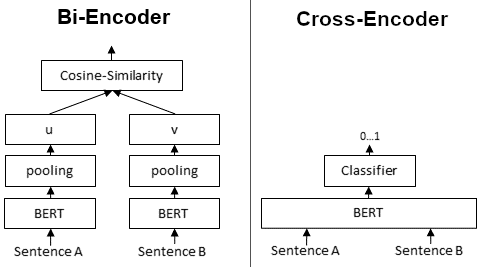

#**MS MARCO**

[MS MARCO Passage Retrieval](https://github.com/microsoft/MSMARCO-Passage-Ranking) (Fixme: chusmear link) is a large dataset with real user queries from Bing search engine with annotated relevant text passages. 

These models can be used like this:


In [ ]:
from sentence_transformers import CrossEncoder
model = CrossEncoder('cross-encoder/ms-marco-TinyBERT-L-2-v2', max_length=512) #antes decía esto, pero le tuve que clavar un modelo para que funcione: model = CrossEncoder('model_name', max_length=512) 
scores = model.predict([('Query1', 'Paragraph1'), ('Query1', 'Paragraph2')])

#For Example
scores = model.predict([('How many people live in Berlin?', 'Berlin had a population of 3,520,031 registered inhabitants in an area of 891.82 square kilometers.'), 
                        ('How many people live in Berlin?', 'Berlin is well known for its museums.')])

ModuleNotFoundError: ignored

*    cross-encoder/ms-marco-TinyBERT-L-2-v2 - MRR@10 on MS Marco Dev Set: 32.56

*    cross-encoder/ms-marco-MiniLM-L-2-v2 - MRR@10 on MS Marco Dev Set: 34.85

*    cross-encoder/ms-marco-MiniLM-L-4-v2 - MRR@10 on MS Marco Dev Set: 37.70

*    cross-encoder/ms-marco-MiniLM-L-6-v2 - MRR@10 on MS Marco Dev Set: 39.01

*    cross-encoder/ms-marco-MiniLM-L-12-v2 - MRR@10 on MS Marco Dev Set: 39.02

For details on the usage, see [Applications - Information Retrieval](https://www.sbert.net/examples/applications/retrieve_rerank/README.html)

[MS MARCO Cross-Encoders - More details](https://www.sbert.net/docs/pretrained-models/ce-msmarco.html)

Fixme: no terminé de entender cómo se usan los CrossEncoders ni qué se supone que tiene que hacer la celda de arriba, pero no creo que lo vaya a usar. Chusmear.

#**SQuAD (QNLI)**

QNLI is based on the [SQuAD dataset](https://rajpurkar.github.io/SQuAD-explorer/) and was introduced by the [GLUE Benchmark] (https://arxiv.org/abs/1804.07461). Given a passage from Wikipedia, annotators created questions that are answerable by that passage.
Fixme: chusmear links de arriba.

*    cross-encoder/qnli-distilroberta-base - Accuracy on QNLI dev set: 90.96

*    cross-encoder/qnli-electra-base - Accuracy on QNLI dev set: 93.21

# **STSbenchmark**

These models have been trained on the [Quora duplicate questions dataset](https://quoradata.quora.com/First-Quora-Dataset-Release-Question-Pairs) (Fixme: el Quora dataset pretende unir preguntas que sean equivalentes, se podría hacer algo así con los contraargumentos. Chusmear este link porque puede dar una idea para hacer algo parecido.20,5311 The dataset that we are releasing today will give anyone the opportunity to train and test models of semantic equivalence, based on actual Quora data.). They can used like the STSb models and give a score 0…1 indicating the probability that two questions are duplicate questions.

*    cross-encoder/quora-distilroberta-base - Average Precision dev set: 87.48

*    cross-encoder/quora-roberta-base - Average Precision dev set: 87.80 

*    cross-encoder/quora-roberta-large - Average Precision dev set: 87.91

Note: The model don’t work for question similarity. The question How to learn Java and How to learn Python will get a low score, as these questions are not duplicates. For question similarity, the respective bi-encoder trained on the Quora dataset yields much more meaningful results.

#**NLI**

Given two sentences, are these contradicting each other, entailing one the other or are these netural? The following models were trained on the [SNLI](https://nlp.stanford.edu/projects/snli/) and [MultiNLI](https://cims.nyu.edu/~sbowman/multinli/) datasets. Fixme: importante: esto puede servir para ver si dos argumentos son equivalentes o no. Revisar estos links.

*    cross-encoder/nli-distilroberta-base - Accuracy on MNLI mismatched set: 83.98

*    cross-encoder/nli-MiniLM2-L6-H768 - Accuracy on MNLI mismatched set: 86.89

*    cross-encoder/nli-roberta-base - Accuracy on MNLI mismatched set: 87.47

*    cross-encoder/nli-deberta-base - Accuracy on MNLI mismatched set: 88.08

In [ ]:
from sentence_transformers import CrossEncoder
model = CrossEncoder('cross-encoder/nli-distilroberta-base')        # Antes decía: model = CrossEncoder('model_name')
scores = model.predict([('A man is eating pizza', 'A man eats something'), ('A black race car starts up in front of a crowd of people.', 'A man is driving down a lonely road.')])

#Convert scores to labels
label_mapping = ['contradiction', 'entailment', 'neutral']
labels = [label_mapping[score_max] for score_max in scores.argmax(axis=1)]

#Fixme: acá no estoy printeando ningún resultado, así estaba en el tutorial.


Downloading:   0%|          | 0.00/701 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/313M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

#**Publications**

Fixme: importante: esta sección dice cómo citar en caso de usar algo de SBERT.

Fixme: importante: en las subsecciones "Repositories using SentenceTransformers", "SentenceTransformers in Articles" y “SentenceTransformers used in Research”  de la sección "Publications", dice usos interesantes de esto, chusmear.

#**USAGE**


##**Computing Sentence Embeddings**

The basic function to compute sentence embeddings looks like this:




In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.', 
    'The quick brown fox jumps over the lazy dog.']

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Sentence: This framework generates embeddings for each input sentence
Embedding: [-1.37173422e-02 -4.28515561e-02 -1.56285800e-02  1.40537368e-02
  3.95537987e-02  1.21796280e-01  2.94333957e-02 -3.17524187e-02
  3.54959741e-02 -7.93139860e-02  1.75878350e-02 -4.04369980e-02
  4.97259498e-02  2.54912097e-02 -7.18700439e-02  8.14969167e-02
  1.47071143e-03  4.79627252e-02 -4.50336374e-02 -9.92174894e-02
 -2.81769391e-02  6.45046085e-02  4.44670394e-02 -4.76217046e-02
 -3.52952331e-02  4.38671485e-02 -5.28566055e-02  4.33061097e-04
  1.01921462e-01  1.64072551e-02  3.26996371e-02 -3.45986746e-02
  1.21339187e-02  7.94871300e-02  4.58345236e-03  1.57778300e-02
 -9.68206301e-03  2.87626013e-02 -5.05805984e-02 -1.55793326e-02
 -2.87906732e-02 -9.62281041e-03  3.15556638e-02  2.27348991e-02
  8.71449336e-02 -3.85027267e-02 -8.84718522e-02 -8.75497889e-03
 -2.12343764e-02  2.08923239e-02 -9.02077332e-02 -5.25732227e-02
 -1.05639026e-02  2.88310666e-02 -1.61455069e-02  6.17838185e-03
 -1.23234

Note: Even though we talk about sentence embeddings, you can use it also for shorter phrases as well as for longer texts with multiple sentences. See the section on Input Sequence Length for more notes on embeddings for paragraphs.

First, we load a sentence-transformer model:

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('model_name_or_path')     #fixme: esta celda no hay que correrla porque le falta el nombre del modelo o el path.

You can either specify a [pre-trained model](https://www.sbert.net/docs/pretrained_models.html) or you can pass a path on your disc to load the sentence-transformer model from that folder.

If available, the model is automatically executed on the GPU. You can specify the device for the model like this:

In [ ]:
model = SentenceTransformer('model_name_or_path', device='cuda')

With device any pytorch device (like CPU, cuda, cuda:0 etc.)

The relevant method to encode a set of sentences / texts is model.encode(). In the following, you can find parameters this method accepts. Some relevant parameters are batch_size (depending on your GPU a different batch size is optimal) as well as convert_to_numpy (returns a numpy matrix) and convert_to_tensor (returns a pytorch tensor).

**classsentence_transformers.SentenceTransformer**(model_name_or_path: Optional[str] = None, modules: Optional[Iterable[torch.nn.modules.module.Module]] = None, device: Optional[str] = None, cache_folder: Optional[str] = None)

Loads or create a SentenceTransformer model, that can be used to map sentences / text to embeddings.

**Parameters**:

*   **model_name_or_path** – If it is a filepath on disc, it loads the model from that path. If it is not a path, it first tries to download a pre-trained SentenceTransformer model. If that fails, tries to construct a model from Huggingface models repository with that name.
*   **modules** – This parameter can be used to create custom SentenceTransformer models from scratch.
*    **device** – Device (like ‘cuda’ / ‘cpu’) that should be used for computation. If None, checks if a GPU can be used.
*    **cache_folder** – Path to store models

Initializes internal Module state, shared by both nn.Module and ScriptModule. Fixme: esto no sé que quiere decir.

**encode**(sentences: Union[str, List[str]], batch_size: int = 32, show_progress_bar: bool = None, output_value: str = 'sentence_embedding', convert_to_numpy: bool = True, convert_to_tensor: bool = False, device: str = None, normalize_embeddings: bool = False) → Union[List[torch.Tensor], numpy.ndarray, torch.Tensor]


Computes sentence embeddings

**Parameters**:

*    **sentences** – the sentences to embed

*    **batch_size** – the batch size used for the computation

*    **show_progress_bar** – Output a progress bar when encode sentences

*    **output_value** – Default sentence_embedding, to get sentence embeddings. Can be set to token_embeddings to get wordpiece token embeddings. Set to None, to get all output values. Fixme: quizás se puede hacer algo utilizando los embeddings de los tokens.

*    **convert_to_numpy** – If true, the output is a list of numpy vectors. Else, it is a list of pytorch tensors.

*    **convert_to_tensor** – If true, you get one large tensor as return. Overwrites any setting from convert_to_numpy

*    **device** – Which torch.device to use for the computation

*    **normalize_embeddings** – If set to true, returned vectors will have length 1. In that case, the faster dot-product (util.dot_score) instead of cosine similarity can be used.

**Returns:** 

By default, a list of tensors is returned. If convert_to_tensor, a stacked tensor is returned. If convert_to_numpy, a numpy matrix is returned.

###**Input Sequence Length**

Transformer models like BERT / RoBERTa / DistilBERT etc. the runtime and the memory requirement grows quadratic with the input length. This limits transformers to inputs of certain lengths. A common value for BERT & Co. are 512 word pieces, which corresponde to about 300-400 words (for English). Longer texts than this are truncated to the first x word pieces. Fixme: buscar que son word pieces.

By default, the provided methods use a limit fo 128 word pieces, longer inputs will be truncated. You can get and set the maximal sequence length like this:

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

print("Max Sequence Length:", model.max_seq_length)

#Change the length to 200
model.max_seq_length = 200

print("Max Sequence Length:", model.max_seq_length)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Max Sequence Length: 256
Max Sequence Length: 200


Note: You cannot increase the length higher than what is maximally supported by the respective transformer model. Also note that if a model was trained on short texts, the representations for long texts might not be that good.

Fixme: importante.

###**Storing & Loading Embeddings**

The easiest method is to use pickle to store pre-computed embeddings on disc and to load it from disc. This can especially be useful if you need to encode large set of sentences.



In [ ]:
#Fixme: importante: esto queda guardado en "files" dentro de esta notebook (hay una solapa a la izq con "files").
from sentence_transformers import SentenceTransformer
import pickle

model = SentenceTransformer('all-MiniLM-L6-v2')
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.', 
    'The quick brown fox jumps over the lazy dog.']


embeddings = model.encode(sentences)

#Store sentences & embeddings on disc
with open('embeddings.pkl', "wb") as fOut:
    pickle.dump({'sentences': sentences, 'embeddings': embeddings}, fOut, protocol=pickle.HIGHEST_PROTOCOL)

#Load sentences & embeddings from disc
with open('embeddings.pkl', "rb") as fIn:
    stored_data = pickle.load(fIn)
    stored_sentences = stored_data['sentences']
    stored_embeddings = stored_data['embeddings']

###**Multi-Process / Multi-GPU Encoding**

You can encode input texts with more than one GPU (or with multiple processes on a CPU machine). For an example, see: [computing_embeddings_mutli_gpu.py](https://github.com/UKPLab/sentence-transformers/blob/master/examples/applications/computing-embeddings/computing_embeddings_mutli_gpu.py) fixme: chusmear link.

The relevant method is **start_multi_process_pool()**, which starts multiple processes that are used for encoding.



```
SentenceTransformer.start_multi_process_pool(target_devices: List[str] = None)
```
Starts multi process to process the encoding with several, independent processes. This method is recommended if you want to encode on multiple GPUs. It is advised to start only one process per GPU. This method works together with encode_multi_process


**Parameters: target_devices** – PyTorch target devices, e.g. cuda:0, cuda:1… If None, all available CUDA devices will be used

**Returns:** Returns a dict with the target processes, an input queue and and output queue.

###**Sentence Embeddings with Transformers**

Most of our pre-trained models are based on [Huggingface.co/Transformers](https://huggingface.co/docs/transformers/index) (fixme: importante: chusmear link) and are also hosted in the [models repository](https://huggingface.co/models) (fixme: chusmear link) from Huggingface. It is possible to use our sentence embeddings models without installing sentence-transformers:

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch


#Mean Pooling - Take attention mask into account for correct averaging. Fixme: entender esto.
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask



#Sentences we want sentence embeddings for
sentences = ['This framework generates embeddings for each input sentence',
             'Sentences are passed as a list of string.',
             'The quick brown fox jumps over the lazy dog.']

#Load AutoModel from huggingface model repository
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
model = AutoModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")

#Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, max_length=128, return_tensors='pt')

#Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

#Perform pooling. In this case, mean pooling
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

ModuleNotFoundError: ignored

You can find the available models here: [https://huggingface.co/sentence-transformers](https://huggingface.co/sentence-transformers). Fixme: chusmear

In the above example we add mean pooling on top of the AutoModel (which will load a BERT model). We also have models with max-pooling and where we use the CLS token. How to apply this pooling correctly, have a look at [sentence-transformers/bert-base-nli-max-tokens](https://huggingface.co/sentence-transformers/bert-base-nli-max-tokens) and [/sentence-transformers/bert-base-nli-cls-token](https://huggingface.co/sentence-transformers/bert-base-nli-cls-token).

Fixme: entender esta celda de texto, la anterior de código, quizás preguntar a el grupo de argumentación como funciona la celda anterior de código.

##**Semantic Textual Similarity**

Once you have [sentence embeddings computed](https://www.sbert.net/examples/applications/computing-embeddings/README.html), you usually want to compare them to each other. Here, I show you how you can compute the cosine similarity between embeddings, for example, to measure the semantic similarity of two texts.


In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

# Two lists of sentences
sentences1 = ['The cat sits outside',
             'A man is playing guitar',
             'The new movie is awesome']

sentences2 = ['The dog plays in the garden',
              'A woman watches TV',
              'The new movie is so great']

#Compute embedding for both lists
embeddings1 = model.encode(sentences1, convert_to_tensor=True)
embeddings2 = model.encode(sentences2, convert_to_tensor=True)

#Compute cosine-similarits
cosine_scores = util.cos_sim(embeddings1, embeddings2)

#Output the pairs with their score
for i in range(len(sentences1)):
  print("{} \t\t {} \t\t Score: {:.4f}".format(sentences1[i], sentences2[i], cosine_scores[i][i]))    # Fixme: averigüar que es {:.4f}

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

The cat sits outside 		 The dog plays in the garden 		 Score: 0.2838
A man is playing guitar 		 A woman watches TV 		 Score: -0.0327
The new movie is awesome 		 The new movie is so great 		 Score: 0.8939


We pass the **convert_to_tensor=True** parameter to the encode function. This will return a pytorch tensor containing our embeddings. We can then call **util.cos_sim(A, B)** which computes the cosine similarity between all vectors in A and all vectors in B.

It returns in the above example a 3x3 matrix with the respective cosine similarity scores for all possible pairs between embeddings1 and embeddings2.

You can use this function also to find out the pairs with the highest cosine similarity scores:

In [ ]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')

# Single list of sentences
sentences = ['The cat sits outside',
             'A man is playing guitar',
             'I love pasta',
             'The new movie is awesome',
             'The cat plays in the garden',
             'A woman watches TV',
             'The new movie is so great',
             'Do you like pizza?']

#Compute embeddings
embeddings = model.encode(sentences, convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.cos_sim(embeddings, embeddings)

#Find the pairs with the highest cosine similarity scores
pairs = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)       #fixme: entender cómo funciona este sort.

for pair in pairs[0:10]:
    i, j = pair['index']
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i], sentences[j], pair['score']))

The new movie is awesome 		 The new movie is so great 		 Score: 0.8939
The cat sits outside 		 The cat plays in the garden 		 Score: 0.6788
I love pasta 		 Do you like pizza? 		 Score: 0.5096
I love pasta 		 The new movie is so great 		 Score: 0.2560
I love pasta 		 The new movie is awesome 		 Score: 0.2440
A man is playing guitar 		 The cat plays in the garden 		 Score: 0.2105
The new movie is awesome 		 Do you like pizza? 		 Score: 0.1969
The new movie is so great 		 Do you like pizza? 		 Score: 0.1692
The cat sits outside 		 A woman watches TV 		 Score: 0.1310
The cat plays in the garden 		 Do you like pizza? 		 Score: 0.0900


Note, in the above approach we use a brute-force approach to find the highest scoring pairs, which has a quadratic complexity. For long lists of sentences, this might be infeasible. If you want find the highest scoring pairs in a long list of sentences, have a look at [Paraphrase Mining](https://www.sbert.net/examples/applications/paraphrase-mining/README.html).





```
# This is formatted as code
```

##**Semantic Search**
Semantic search seeks to improve search accuracy by understanding the content of the search query. In contrast to traditional search engines which only find documents based on lexical matches, semantic search can also find synonyms.

###**Background**

The idea behind semantic search is to embed all entries in your corpus, whether they be sentences, paragraphs, or documents, into a vector space.

At search time, the query is embedded into the same vector space and the closest embeddings from your corpus are found. These entries should have a high semantic overlap with the query.

#Fixme: mega importante: lo que yo quiero hacer con argumentación, es parecido a Semantic Search.

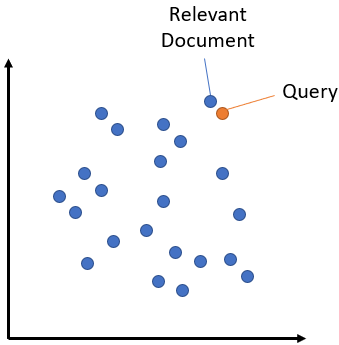


### **Symmetric vs. Asymmetric Semantic Search**

A **critical distinction** for your setup is symmetric vs. asymmetric semantic search:

*    For **symmetric semantic** search your query and the entries in your corpus are of about the same length and have the same amount of content. An example would be searching for similar questions: Your query could for example be “How to learn Python online?” and you want to find an entry like “How to learn Python on the web?”. For symmetric tasks, you could potentially flip the query and the entries in your corpus.

*    For **asymmetric semantic search**, you usually have a short query (like a question or some keywords) and you want to find a longer paragraph answering the query. An example would be a query like “What is Python” and you wand to find the paragraph “Python is an interpreted, high-level and general-purpose programming language. Python’s design philosophy …”. For asymmetric tasks, flipping the query and the entries in your corpus usually does not make sense.

Fixme: importante: creo que lo de argumentación, sería asymmetric, pero puedo ver que pasa si uso symmetric.

It is critical **that you choose the right model** for your type of task. Fixme: mega importante.

Suitable models for **symmetric semantic search**: [Pre-Trained Sentence Embedding Models](https://www.sbert.net/docs/pretrained_models.html#sentence-embedding-models)

Suitable models for **asymmetric semantic search**: [Pre-Trained MS MARCO Models](https://www.sbert.net/docs/pretrained-models/msmarco-v3.html)
Fixme: chusmear estos últimos dos links.

### **Python**

For small corpora (up to about 1 million entries) we can compute the cosine-similarity between the query and all entries in the corpus. Fixme: importante: para mi trabajo voy a poder calcular el cosine-similarity para todas las entradas.

In the following example, we define a small corpus with few example sentences and compute the embeddings for the corpus as well as for our query.

We then use the [util.cos_sim()](https://www.sbert.net/docs/usage/semantic_textual_similarity.html) function to compute the cosine similarity between the query and all corpus entries. Fixme: chequear link.

For large corpora, sorting all scores would take too much time. Hence, we use [torch.topk](https://pytorch.org/docs/stable/generated/torch.topk.html) to only get the top k entries. Fixme: chequear este link.

For a simple example, see [semantic_search.py](https://github.com/UKPLab/sentence-transformers/blob/master/examples/applications/semantic-search/semantic_search.py). Fixme: chequear este link:

In [ ]:
"""
This is a simple application for sentence embeddings: semantic search

We have a corpus with various sentences. Then, for a given query sentence,
we want to find the most similar sentence in this corpus.

This script outputs for various queries the top 5 most similar sentences in the corpus.
"""
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

# Corpus with example sentences
corpus = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'The girl is carrying a baby.',
          'A man is riding a horse.',
          'A woman is playing violin.',
          'Two men pushed carts through the woods.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'A cheetah is running behind its prey.'
          ]
corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)

# Query sentences:
queries = ['A man is eating pasta.', 'Someone in a gorilla costume is playing a set of drums.', 'A cheetah chases prey on across a field.']


# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = min(5, len(corpus))
for query in queries:
    query_embedding = embedder.encode(query, convert_to_tensor=True)

    # We use cosine-similarity and torch.topk to find the highest 5 scores
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    top_results = torch.topk(cos_scores, k=top_k)

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for score, idx in zip(top_results[0], top_results[1]):  #fixme: importante: chusmear esta función zip y las otras formas de iterar data de python. Ver como funciona este for.
        print(corpus[idx], "(Score: {:.4f})".format(score))

    """
    # Alternatively, we can also use util.semantic_search to perform cosine similarty + topk
    hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=5)
    hits = hits[0]      #Get the hits for the first query
    for hit in hits:
        print(corpus[hit['corpus_id']], "(Score: {:.4f})".format(hit['score']))
    """

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]





Query: A man is eating pasta.

Top 5 most similar sentences in corpus:
A man is eating food. (Score: 0.7035)
A man is eating a piece of bread. (Score: 0.5272)
A man is riding a horse. (Score: 0.1889)
A man is riding a white horse on an enclosed ground. (Score: 0.1047)
A cheetah is running behind its prey. (Score: 0.0980)




Query: Someone in a gorilla costume is playing a set of drums.

Top 5 most similar sentences in corpus:
A monkey is playing drums. (Score: 0.6433)
A woman is playing violin. (Score: 0.2564)
A man is riding a horse. (Score: 0.1389)
A man is riding a white horse on an enclosed ground. (Score: 0.1191)
A cheetah is running behind its prey. (Score: 0.1080)




Query: A cheetah chases prey on across a field.

Top 5 most similar sentences in corpus:
A cheetah is running behind its prey. (Score: 0.8253)
A man is eating food. (Score: 0.1399)
A monkey is playing drums. (Score: 0.1292)
A man is riding a white horse on an enclosed ground. (Score: 0.1097)
A man is riding a 

### **util.semantic_search**

Instead of implementing semantic search by yourself, you can use the util.semantic_search function.

The function accepts the following parameters:



```
sentence_transformers.util.semantic_search(query_embeddings: torch.Tensor, corpus_embeddings: torch.Tensor, query_chunk_size: int = 100, corpus_chunk_size: int = 500000, top_k: int = 10, score_function: Callable[[torch.Tensor, torch.Tensor], torch.Tensor] = <function cos_sim>)
```

Fixme: todo: entender la sintaxis de score_function: Callable[[torch.Tensor, torch.Tensor], torch.Tensor] = <function cos_sim>

This function performs a cosine similarity search between a list of query embeddings and a list of corpus embeddings. It can be used for Information Retrieval / Semantic Search for corpora up to about 1 Million entries. Fixme: tener en claro que es information retrieval, creo que está más adelante en el tutorial.

**Parameters**
*    query_embeddings – A 2 dimensional tensor with the query embeddings. Fixme: Todo: por qué es 2 dimesional?

*    corpus_embeddings – A 2 dimensional tensor with the corpus embeddings.Fixme: Todo: por qué es 2 dimesional?

*    query_chunk_size – Process 100 queries simultaneously. Increasing that value increases the speed, but requires more memory.

*    corpus_chunk_size – Scans the corpus 100k entries at a time. Increasing that value increases the speed, but requires more memory. Fixme: en la celda de código de la función dice 500k, algo está mal (o la celda de código o esta descripción).

*    top_k – Retrieve top k matching entries.

*    score_function – Function for computing scores. By default, cosine similarity.


**Returns**
    
*    Returns a list with one entry for each query. Each entry is a list of dictionaries with the keys ‘corpus_id’ and ‘score’, sorted by decreasing cosine similarity scores.

By default, up to 100 queries are processed in parallel. Further, the corpus is chunked into set of up to 500k entries. You can increase query_chunk_size and corpus_chunk_size, which leads to increased speed for large corpora, but also increases the memory requirement.

### **Speed Optimization**

To get the optimal speed for the **util.semantic_search** method, it is advisable to have the query_embeddings as well as the corpus_embeddings on the same GPU-device. This significantly boost the performance. Fixme: importante.

Further, we can normalize the corpus embeddings so that each corpus embeddings is of length 1. In that case, we can use dot-product for computing scores. Fixme: importante.

In [ ]:
corpus_embeddings = corpus_embeddings.to('cuda')  #fixme: todo: averiguar que hace esto, supongo que convierte corpus_embeddings a un embedding en cuda.
corpus_embeddings = util.normalize_embeddings(corpus_embeddings)

query_embeddings = query_embeddings.to('cuda')
query_embeddings = util.normalize_embeddings(query_embeddings)
hits = util.semantic_search(query_embeddings, corpus_embeddings, score_function=util.dot_score)

RuntimeError: ignored

###**ElasticSearch**

Starting with version 7.3, [ElasticSearch](https://www.elastic.co/elasticsearch/) introduced the possibility to index dense vectors and to use to for document scoring. Hence, we can use ElasticSearch to index embeddings along the documents and we can use the query embeddings to retrieve relevant entries. Fixme: Todo: chusmear esto, puede ser interesante para mi trabajo.

An advantage of ElasticSearch is that it is easy to add new documents to an index and that we can store also other data along with our vectors. A disadvantage is the slow performance, as it compares the query embeddings with all stored embeddings. This has a linear run-time and might be too slow for large (>100k) corpora.

For further details, see [semantic_search_quora_elasticsearch.py](https://github.com/UKPLab/sentence-transformers/blob/master/examples/applications/semantic-search/semantic_search_quora_elasticsearch.py). Fixme: todo: chusmear link.

Fixme: se puede usar elasticSEarch para buscar contranarrativas.

###**Approximate Nearest Neighbor**

Searching a large corpus with millions of embeddings can be time-consuming if exact nearest neighbor search is used (like it is used by util.semantic_search).

In that case, Approximate Nearest Neighor (ANN) can be helpful. Here, the data is partitioned into smaller fractions of similar embeddings. This index can be searched efficiently and the embeddings with the highest similarity (the nearest neighbors) can be retrieved within milliseconds, even if you have millions of vectors. Fixme: importante. Fixme: Todo: no termino de entender cómo se particiona la data.

However, the results are not necessarily exact. It is possible that some vectors with high similarity will be missed. That’s the reason why it is called approximate nearest neighbor.

For all ANN methods, there are usually one or more parameters to tune that determine the recall-speed trade-off. If you want the highest speed, you have a high chance of missing hits. If you want high recall, the search speed decreases.

Three popular libraries for approximate nearest neighbor are [Annoy](https://github.com/spotify/annoy), [FAISS](https://github.com/facebookresearch/faiss), and [hnswlib](https://github.com/nmslib/hnswlib/). Personally I find hnswlib the most suitable library: It is easy to use, offers a great performance and has nice features included that are important for real applications. Fixme: quizás chusmear, pero no perder mucho tiempo en esto.

Examples:

*    [semantic_search_quora_hnswlib.py](https://github.com/UKPLab/sentence-transformers/blob/master/examples/applications/semantic-search/semantic_search_quora_hnswlib.py)

*    [semantic_search_quora_annoy.py](https://github.com/UKPLab/sentence-transformers/blob/master/examples/applications/semantic-search/semantic_search_quora_annoy.py)

*    [semantic_search_quora_faiss.py](https://github.com/UKPLab/sentence-transformers/blob/master/examples/applications/semantic-search/semantic_search_quora_faiss.py)

Fixme: todo: chusmear estos ejemplos.



```
`# This is formatted as code`
```

###**Retrieve & Re-Rank**
For complex semantic search scenarios, a retrieve & re-rank pipeline is advisable:
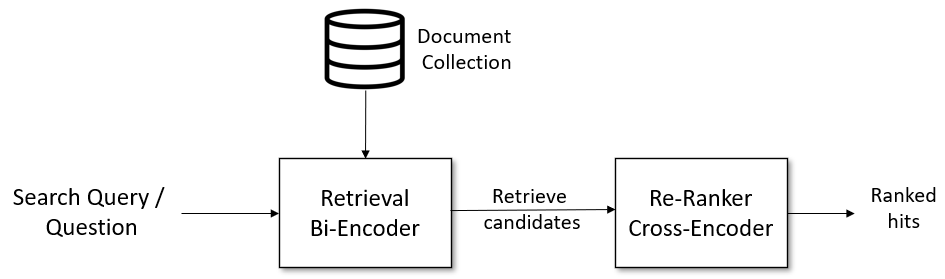

For further details, see [Retrieve & Re-rank](https://www.sbert.net/examples/applications/retrieve_rerank/README.html). Fixme: todo: ver este pipeline porque me puede servir para mi trabajo.

###**Examples**
In the following we list examples for different use-cases.

####**Similar Questions Retrieval**

[semantic_search_quora_pytorch.py](https://github.com/UKPLab/sentence-transformers/blob/master/examples/applications/semantic-search/semantic_search_publications.py) [ [Colab version](https://colab.research.google.com/drive/12cn5Oo0v3HfQQ8Tv6-ukgxXSmT3zl35A?usp=sharing) ] shows an example based on the [Quora duplicate questions dataset](https://quoradata.quora.com/First-Quora-Dataset-Release-Question-Pairs). The user can enter a question, and the code retrieves the most similar questions from the dataset using the util.semantic_search method. As model, we use distilbert-multilingual-nli-stsb-quora-ranking, which was trained to identify similar questions and supports 50+ languages. Hence, the user can input the question in any of the 50+ languages. This is a symmetric search task, as the search queries have the same length and content as the questions in the corpus.
Fixme: quizás chusmear estos links, no los veo tan necesarios por ahora.

####**Similar Publication Retrieval**
[semantic_search_publications.py](https://github.com/UKPLab/sentence-transformers/blob/master/examples/applications/semantic-search/semantic_search_publications.py) [ [Colab version](https://colab.research.google.com/drive/12hfBveGHRsxhPIUMmJYrll2lFU4fOX06?usp=sharing) ] shows an example how to find similar scientific publications. As corpus, we use all publications that have been presented at the EMNLP 2016 - 2018 conferences. As search query, we input the title and abstract of more recent publications and find related publications from our copurs. We use the [SPECTER](https://arxiv.org/abs/2004.07180) model. This is a symmetric search task, as the paper in the corpus consists of title & abstract and we search for title & abstract.
Fixme: estos papers no creo que me sirvan tanto, en todo caso, chusmear lo de SPECTER.

####**Question & Answer Retrieval**
[semantic_search_wikipedia_qa.py](https://github.com/UKPLab/sentence-transformers/blob/master/examples/applications/semantic-search/semantic_search_wikipedia_qa.py) [ [Colab Version](https://colab.research.google.com/drive/11GunvCqJuebfeTlgbJWkIMT0xJH6PWF1?usp=sharing) ]: This example uses a model that was trained on the [Natural Questions](https://ai.google.com/research/NaturalQuestions/) dataset. It consists of about 100k real Google search queries, together with an annotated passage from Wikipedia that provides the answer. It is an example of an asymmetric search task. As corpus, we use the smaller [Simple English Wikipedia](https://simple.wikipedia.org/wiki/Main_Page) so that it fits easily into memory.
Fixme: quizás chusmear esto. El trabajo de argumentación sería una tarea de búsqueda asimétrica, quizás me pueda servir chusmear esto.

[retrieve_rerank_simple_wikipedia.py](https://github.com/UKPLab/sentence-transformers/tree/master/examples/applications/retrieve_rerank/retrieve_rerank_simple_wikipedia.py) [ [Colab Version](https://colab.research.google.com/github/UKPLab/sentence-transformers/blob/master/examples/applications/retrieve_rerank/retrieve_rerank_simple_wikipedia.ipynb) ]: This script uses the [Retrieve & Re-rank](https://www.sbert.net/examples/applications/retrieve_rerank/README.html) strategy and is an example for an **asymmetric search task**. We split all Wikipedia articles into paragraphs and encode them with a bi-encoder. If a new query / question is entered, it is encoded by the same bi-encoder and the paragraphs with the highest cosine-similarity are retrieved (see [semantic search](https://www.sbert.net/examples/applications/semantic-search/README.html#)). Next, the retrieved candidates are scored by a Cross-Encoder re-ranker and the 5 passages with the highest score from the Cross-Encoder are presented to the user. We use models that were trained on the [MS Marco Passage Reranking](https://github.com/microsoft/MSMARCO-Passage-Ranking/) dataset, a dataset with about 500k real queries from Bing search.
fixme: todo: repasar que era un bi-encoder
Fixme: estos modelos entrenados en MS Marco Passage, pueden llegar a servir para el trabajo de argumentación.

##**Retrieve & Re-Rank**
In [Semantic Search](https://www.sbert.net/examples/applications/semantic-search/README.html) we have shown how to use SentenceTransformer to compute embeddings for queries, sentences, and paragraphs and how to use this for semantic search.

For complex search tasks, for example, for question answering retrieval, the search can significantly be improved by using **Retrieve & Re-Rank**.



###**Retrieve & Re-Rank Pipeline**

A pipeline for information retrieval / question answering retrieval that works well is the following. All components are provided and explained in this article:


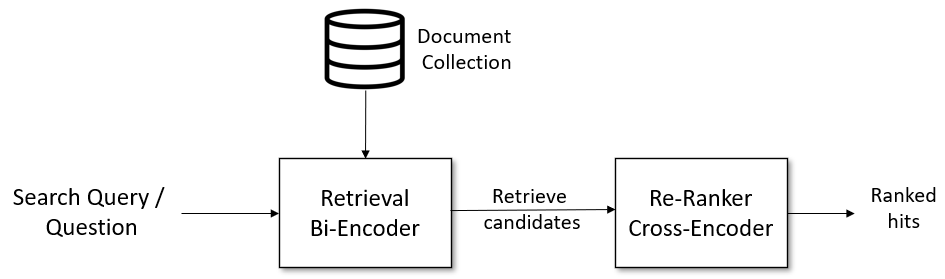

Given a search query, we first use a **retrieval system** that retrieves a large list of e.g. 100 possible hits which are potentially relevant for the query. For the retrieval, we can use either lexical search, e.g. with ElasticSearch, or we can use dense retrieval with a bi-encoder.

However, the retrieval system might retrieve documents that are not that relevant for the search query. Hence, in a second stage, we use a re-ranker based on a cross-encoder that scores the relevancy of all candidates for the given search query.

The output will be a ranked list of hits we can present to the user.

Fixme: volver a leer esto y sobre todo profundizar los distintos componentes.
Fixme: el pipeline de contranarrativas es algo parecido, me parece.

###**Retrieval: Bi-Encoder**

For the retrieval of the candidate set, we can either use lexical search (e.g. [ElasticSearch](https://www.elastic.co/elasticsearch/)), or we can use a bi-encoder which is implemented in this repository.

Lexical search looks for literal matches of the query words in your document collection. It will not recognize synonyms, acronyms or spelling variations. In contrast, semantic search (or dense retrieval) encodes the search query into vector space and retrieves the document embeddings that are close in vector space.

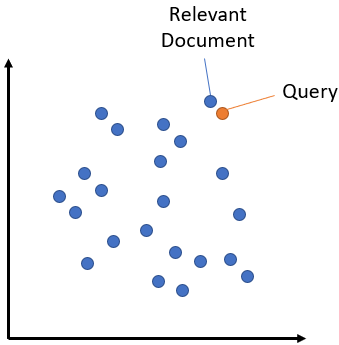

Semantic search overcomes the short comings of lexical search and can recognize synonym and acronyms. Have a look at the [semantic search article](https://www.sbert.net/examples/applications/semantic-search/README.html) for different options to implement semantic search.

Voy por "Re-Ranker: Cross-Encoder" de https://www.sbert.net/examples/applications/retrieve_rerank/README.html